In [2]:
#数据来自美国P2P平台LandingClub


In [139]:
#数据缺失值以及无用项较多，使用Pandas进行数据清洗
import pandas as pd
loans_2007 = pd.read_csv('LoanStats3a.csv', skiprows=1)
#将数据行数少于一半的列清除
half_count = len(loans_2007) / 2
loans_2007 = loans_2007.dropna(thresh=half_count, axis=1)
#将描述以及连接地址等无用项清除
loans_2007 = loans_2007.drop(['desc', 'url'],axis=1)
#将清洗过的文件保存
loans_2007.to_csv('loans_2007.csv', index=False)

D:\Program Files\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [140]:
import pandas as pd
loans_2007 = pd.read_csv("loans_2007.csv")
#读取文件的元素名称和第一行的数据
print(loans_2007.iloc[0])
print(loans_2007.shape[1])

id                                1077501
member_id                      1.2966e+06
loan_amnt                            5000
funded_amnt                          5000
funded_amnt_inv                      4975
term                            36 months
int_rate                           10.65%
installment                        162.87
grade                                   B
sub_grade                              B2
emp_title                             NaN
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
issue_d                          Dec-2011
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
zip_code                            860xx
addr_state                             AZ
dti                                 27.65
delinq_2yrs                       

D:\Program Files\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [141]:
#将已经同意贷款后发生的事件项目等清除
loans_2007 = loans_2007.drop(["id", "member_id", "funded_amnt", "funded_amnt_inv", "grade", "sub_grade", "emp_title", "issue_d"], axis=1)

In [142]:
#将线性相关的项只保留其中一个
loans_2007 = loans_2007.drop(["zip_code", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp"], axis=1)

In [143]:

loans_2007 = loans_2007.drop(["total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis=1)
print(loans_2007.iloc[0])
print(loans_2007.shape[1])

loan_amnt                            5000
term                            36 months
int_rate                           10.65%
installment                        162.87
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
addr_state                             AZ
dti                                 27.65
delinq_2yrs                             0
earliest_cr_line                 Jan-1985
inq_last_6mths                          1
open_acc                                3
pub_rec                                 0
revol_bal                           13648
revol_util                          83.7%
total_acc                               9
initial_list_status                     f
last_credit_pull_d               N

In [144]:
#查看 贷款状况  项中的分类以及计数情况
print(loans_2007['loan_status'].value_counts())

Fully Paid                                             33902
Charged Off                                             5658
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  201
Late (31-120 days)                                        10
In Grace Period                                            9
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64


In [145]:
#将贷款状况  进行赋值转换（忽略量级较小的项）
loans_2007 = loans_2007[(loans_2007['loan_status'] == "Fully Paid") | (loans_2007['loan_status'] == "Charged Off")]

status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

loans_2007 = loans_2007.replace(status_replace)

In [146]:
#删除整列都是同一数值的项
#定义列
orig_columns = loans_2007.columns
#过滤项中的唯一值和缺失值
drop_columns = []
for col in orig_columns:
    col_series = loans_2007[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loans_2007 = loans_2007.drop(drop_columns, axis=1)
print(drop_columns)
print (loans_2007.shape)
loans_2007.to_csv('filtered_loans_2007.csv', index=False)

['initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
(39560, 24)


In [147]:
import pandas as pd
loans = pd.read_csv('filtered_loans_2007.csv')
#查看每列中的缺失值的总和
null_counts = loans.isnull().sum()
print(null_counts)

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1073
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
pymnt_plan                 0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


In [148]:
#将缺失值较多的项删除
loans = loans.drop("pub_rec_bankruptcies", axis=1)
loans = loans.dropna(axis=0)
print(loans.dtypes.value_counts())

object     12
float64    10
int64       1
dtype: int64


In [149]:
#object值不能用于机器学习运算 使用查询将object值得类型列出
object_columns_df = loans.select_dtypes(include=["object"])
print(object_columns_df.iloc[0])

term                     36 months
int_rate                    10.65%
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
pymnt_plan                       n
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Nov-2016
Name: 0, dtype: object


In [150]:
#将取值为字符类型的属性值进行取值计数
cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']
for c in cols:
    print(loans[c].value_counts())

RENT        18371
MORTGAGE    17131
OWN          2827
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16436
Verified           12251
Source Verified     9741
Name: verification_status, dtype: int64
10+ years    8821
< 1 year     4563
2 years      4371
3 years      4074
4 years      3409
5 years      3270
1 year       3227
6 years      2212
7 years      1756
8 years      1472
9 years      1253
Name: emp_length, dtype: int64
 36 months    28234
 60 months    10194
Name: term, dtype: int64
CA    6882
NY    3684
FL    2766
TX    2659
NJ    1814
IL    1480
PA    1470
VA    1371
GA    1352
MA    1306
OH    1177
MD    1030
AZ     828
WA     800
CO     764
NC     754
CT     728
MI     688
MO     658
MN     589
NV     477
SC     462
WI     439
OR     431
AL     429
LA     425
KY     321
OK     292
KS     258
UT     251
AR     233
DC     211
RI     196
NM     182
HI     168
WV     167
NH     162
DE     110
WY      79
MT      78
AK      77
SD      62
VT  

In [151]:

print(loans["purpose"].value_counts())
print(loans["title"].value_counts())

debt_consolidation    18137
credit_card            4970
other                  3803
home_improvement       2869
major_purchase         2108
small_business         1771
car                    1492
wedding                 932
medical                 667
moving                  557
house                   365
vacation                350
educational             312
renewable_energy         95
Name: purpose, dtype: int64
Debt Consolidation                          2128
Debt Consolidation Loan                     1671
Personal Loan                                640
Consolidation                                503
debt consolidation                           483
Credit Card Consolidation                    348
Home Improvement                             344
Debt consolidation                           323
Small Business Loan                          310
Credit Card Loan                             302
Personal                                     296
Consolidation Loan                       

In [152]:
#将工作年限的值进行数字替代
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
#将其余几项属性值中等不能机器运算的符号去掉
loans = loans.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
loans["int_rate"] = loans["int_rate"].str.rstrip("%").astype("float")
loans["revol_util"] = loans["revol_util"].str.rstrip("%").astype("float")
loans = loans.replace(mapping_dict)

In [153]:
#将处理完的数据合并到loans中
cat_columns = ["home_ownership", "verification_status", "emp_length", "purpose", "term"]
dummy_df = pd.get_dummies(loans[cat_columns])
loans = pd.concat([loans, dummy_df], axis=1)
loans = loans.drop(cat_columns, axis=1)
loans = loans.drop("pymnt_plan", axis=1)

In [154]:
loans.to_csv('cleaned_loans2007.csv', index=False)


In [156]:
import pandas as pd
loans = pd.read_csv("cleaned_loans2007.csv")
print(loans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38428 entries, 0 to 38427
Data columns (total 37 columns):
loan_amnt                              38428 non-null float64
int_rate                               38428 non-null float64
installment                            38428 non-null float64
annual_inc                             38428 non-null float64
loan_status                            38428 non-null int64
dti                                    38428 non-null float64
delinq_2yrs                            38428 non-null float64
inq_last_6mths                         38428 non-null float64
open_acc                               38428 non-null float64
pub_rec                                38428 non-null float64
revol_bal                              38428 non-null float64
revol_util                             38428 non-null float64
total_acc                              38428 non-null float64
home_ownership_MORTGAGE                38428 non-null int64
home_ownership_NONE        

In [161]:
#使用处理好的数据进行逻辑回归建模
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#定义参数
cols = loans.columns
#将数据去掉我们设定好的label值
train_cols = cols.drop("loan_status")
features = loans[train_cols]
target = loans["loan_status"]
lr.fit(features,target)
#将特征与返回值进行逻辑回归预测
predictions = lr.predict(features)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38428 entries, 0 to 38427
Data columns (total 36 columns):
loan_amnt                              38428 non-null float64
int_rate                               38428 non-null float64
installment                            38428 non-null float64
annual_inc                             38428 non-null float64
dti                                    38428 non-null float64
delinq_2yrs                            38428 non-null float64
inq_last_6mths                         38428 non-null float64
open_acc                               38428 non-null float64
pub_rec                                38428 non-null float64
revol_bal                              38428 non-null float64
revol_util                             38428 non-null float64
total_acc                              38428 non-null float64
home_ownership_MORTGAGE                38428 non-null int64
home_ownership_NONE                    38428 non-null int64
home_ownership_OTHER       

In [109]:
#将预测结果与真实结果进行查全率分类
import pandas as pd
# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# 算出真正率与假正率
tpr = tp / float((tp + fn))
fpr = fp / float((fp + tn))

print(tpr)
print(fpr)
print (predictions[:20])

0.9992428143077808
0.9981519127702828
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [110]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
cols = loans.columns
train_cols = cols.drop("loan_status")
features = loans[train_cols]
target = loans["loan_status"]
lr.fit(features, target)
predictions = lr.predict(features)

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_predict, KFold
lr = LogisticRegression()
#引入交叉检验
kf = KFold(features.shape[0], random_state=1)
predictions = cross_val_predict(lr, features, target, cv=kf)
predictions = pd.Series(predictions)
#再次计算真假正率

fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])


tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])


fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])


tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

#计算真正率和假证率
tpr = tp / float((tp + fn))
fpr = fp / float((fp + tn))

print(tpr)
print(fpr)
print (predictions[:20])#样本过拟合 

0.9991216645970258
0.9981519127702828
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
dtype: int64


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_predict
#加入样本均衡参数
lr = LogisticRegression(class_weight="balanced")
kf = KFold(features.shape[0], random_state=1)
predictions = cross_val_predict(lr, features, target, cv=kf)
predictions = pd.Series(predictions)

# 假证
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# 真正
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# 假负
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# 真负
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# 计算真正率和假证率
tpr = tp / float((tp + fn))
fpr = fp / float((fp + tn))

print(tpr)
print(fpr)
print (predictions[:20])

0.6713511221491959
0.398817224172981
0     1
1     0
2     0
3     1
4     1
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    1
14    0
15    0
16    1
17    1
18    1
19    0
dtype: int64


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_predict
penalty = {
  0: 5,
   1:1
}

lr = LogisticRegression(class_weight=penalty)
kf = KFold(features.shape[0], random_state=1)
predictions = cross_val_predict(lr, features, target, cv=kf)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / float((tp + fn))
fpr = fp / float((fp + tn))

print(tpr)
print(fpr)

0.7449192840052095
0.5067455183884679


In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_predict
rf = RandomForestClassifier(n_estimators=50, max_features=36,class_weight='balanced',min_samples_leaf=50, random_state=1)



kf = KFold(features.shape[0], random_state=1)
predictions = cross_val_predict(rf, features, target, cv=kf)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / float((tp + fn))
fpr = fp / float((fp + tn))

print(tpr)
print(fpr)
print(loans['loan_amnt'])

0.7385286367628797
0.4836444280170024
0         5000.0
1         2500.0
2         2400.0
3        10000.0
4         5000.0
5         7000.0
6         3000.0
7         5600.0
8         5375.0
9         6500.0
10       12000.0
11        9000.0
12        3000.0
13       10000.0
14        1000.0
15       10000.0
16        3600.0
17        6000.0
18        9200.0
19       20250.0
20       21000.0
21       10000.0
22       10000.0
23        6000.0
24       15000.0
25       15000.0
26        5000.0
27        4000.0
28        8500.0
29        4375.0
          ...   
38398    12000.0
38399    20000.0
38400     1200.0
38401    12250.0
38402     2700.0
38403     5000.0
38404     3500.0
38405     5000.0
38406     5000.0
38407    25000.0
38408    10000.0
38409     5000.0
38410     5100.0
38411     5400.0
38412     5300.0
38413     5000.0
38414     3000.0
38415     3000.0
38416     5000.0
38417     5000.0
38418     5000.0
38419     5000.0
38420     5000.0
38421     5000.0
38422     5000.0
38423     

D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


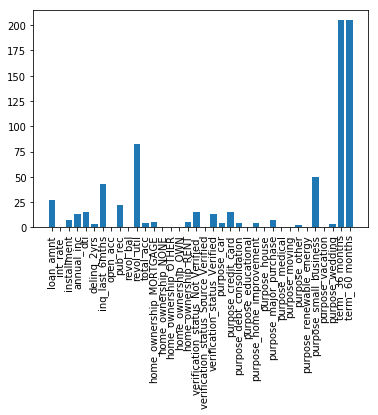

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38428 entries, 0 to 38427
Data columns (total 6 columns):
loan_amnt                 38428 non-null float64
revol_util                38428 non-null float64
inq_last_6mths            38428 non-null float64
purpose_small_business    38428 non-null int64
term_ 36 months           38428 non-null int64
term_ 60 months           38428 non-null int64
dtypes: float64(3), int64(3)
memory usage: 1.8 MB
None


In [162]:
from sklearn.feature_selection import SelectKBest,f_classif
import matplotlib.pyplot as plt
import numpy as np
predictor = [ 'loan_amnt',                             
'int_rate ',                             
'installment',                            
'annual_inc',                                                        
'dti',                                   
'delinq_2yrs',                           
'inq_last_6mths',                       
'open_acc',                            
'pub_rec' ,                              
'revol_bal',                             
'revol_util',                             
'total_acc' ,                            
'home_ownership_MORTGAGE',                
'home_ownership_NONE',                    
'home_ownership_OTHER',                  
'home_ownership_OWN',                     
'home_ownership_RENT' ,                   
'verification_status_Not Verified ' ,    
'verification_status_Source Verified' ,  
'verification_status_Verified',          
'purpose_car' ,                          
'purpose_credit_card'  ,                  
'purpose_debt_consolidation' ,           
'purpose_educational',                   
'purpose_home_improvement',             
'purpose_house',                          
'purpose_major_purchase' ,              
'purpose_medical',                        
'purpose_moving' ,                       
'purpose_other',                         
'purpose_renewable_energy' ,            
'purpose_small_business',                 
'purpose_vacation',                      
'purpose_wedding',                       
'term_ 36 months',                        
'term_ 60 months',]


selector = SelectKBest(f_classif,k=5)
selector.fit(features, target)
 
#通过加入噪音值观察
scores = -np.log10(selector.pvalues_)

#输出柱状图
plt.bar(range(len(predictor)),scores)
plt.xticks(range(len(predictor)),predictor,rotation='vertical')
plt.show()

predictors = ['loan_amnt','revol_util','inq_last_6mths','purpose_small_business','term_ 36 months','term_ 60 months']

features = loans[predictors]
print (features.info())


In [186]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_predict



rf = RandomForestClassifier(n_estimators=20, class_weight='balanced',max_features=6,min_samples_split=4,min_samples_leaf=20, random_state=1)




kf = KFold(features.shape[0], random_state=1)
predictions = cross_val_predict(rf, features, target, cv=kf)
predictions = pd.Series(predictions)


fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])


tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])


fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])


tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

tpr = tp / float((tp + fn))
fpr = fp / float((fp + tn))

print(tpr)
print(fpr)


0.7394978344489203
0.5603400480502679


In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_predict
#加入样本均衡参数
lr = LogisticRegression(class_weight="balanced")
kf = KFold(features.shape[0], random_state=1)
predictions = cross_val_predict(lr, features, target, cv=kf)
predictions = pd.Series(predictions)

# 假证
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# 真正
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# 假负
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# 真负
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# 计算真正率和假证率
tpr = tp / float((tp + fn))
fpr = fp / float((fp + tn))

print(tpr)
print(fpr)

0.6681103673864979
0.42894104601737204
